In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from glob import glob
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

In [2]:
train_labels = pd.read_csv("./dataset/train_labels.csv")
train_labels.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [3]:
id_label_map = {k:v for k,v in zip(train_labels.id.values, train_labels.label.values)}
{k: id_label_map[k] for k in list(id_label_map)[:10]}

{'f38a6374c348f90b587e046aac6079959adf3835': 0,
 'c18f2d887b7ae4f6742ee445113fa1aef383ed77': 1,
 '755db6279dae599ebb4d39a9123cce439965282d': 0,
 'bc3f0c64fb968ff4a8bd33af6971ecae77c75e08': 0,
 '068aba587a4950175d04c680d38943fd488d6a9d': 0,
 'acfe80838488fae3c89bd21ade75be5c34e66be7': 0,
 'a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da': 1,
 '7f6ccae485af121e0b6ee733022e226ee6b0c65f': 1,
 '559e55a64c9ba828f700e948f6886f4cea919261': 0,
 '8eaaa7a400aa79d36c2440a4aa101cc14256cda4': 0}

In [4]:
def get_id_from_file_path(file_path):
    return file_path.split(os.path.sep)[-1].replace('.tif', '')

In [5]:
files = glob('./dataset/training/*.tif')

./dataset/training/f0c2a0b8ef3024f407fa97d852d49be0215cafe0.tif
9216
f0c2a0b8ef3024f407fa97d852d49be0215cafe0


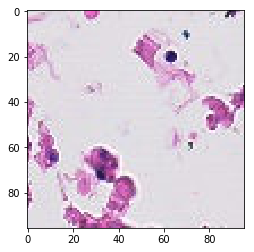

In [6]:
print(files[0])
image = Image.open(files[0])
print(len(list(image.getdata())))
print(get_id_from_file_path(files[0]))
plt.imshow(image)
plt.show()

In [7]:
imarray = np.array(image)
imarray.shape

(96, 96, 3)

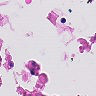

In [8]:
Image.fromarray(imarray)

In [9]:
def shape_1d(imarray):
    nsamples, nx, ny = imarray.shape
    return imarray.reshape((nsamples*nx*ny))

In [10]:
sample_files = files

In [11]:
train, test = train_test_split(sample_files, test_size=0.2, random_state=101010)

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [13]:
def get_imarrary_target(dataset):
    list_imgarray = []
    target = []
    for file in dataset:
        image = Image.open(file)
        imarray = np.array(image)
        imarray = shape_1d(imarray)
        list_imgarray.append(imarray)
        target.append(id_label_map[get_id_from_file_path(file)])
    return np.asarray(list_imgarray), target

In [14]:
list_imgarray, target = get_imarrary_target(train)

In [15]:
forest_clf.fit(np.asarray(list_imgarray), target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
sample_test_files = files[10:]
list_imgarray_test, target_test = get_imarrary_target(test)
predicted = forest_clf.predict(list_imgarray_test)

In [17]:
precision_score(predicted, target_test), recall_score(predicted, target_test)

(0.544138279364723, 0.7323262839879154)

In [18]:
roc_auc_score(predicted, target_test)

0.7341462396698881

In [19]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(predicted, target_test)

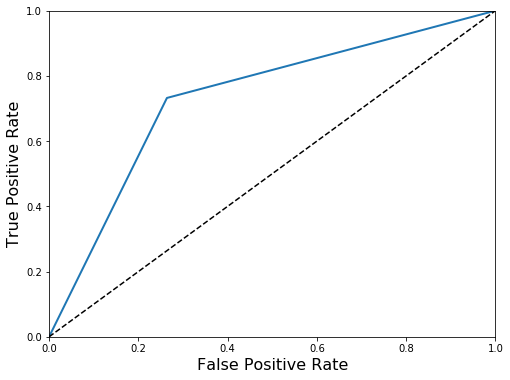

In [21]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()